In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
max_k = 10

# 1. Data Pre-processing

In [4]:
df = pd.read_csv('spotify_songs.csv').drop_duplicates().dropna()
num_features = df.select_dtypes(include=['float64', 'int64']).columns
df[num_features] = StandardScaler().fit_transform(df[num_features])

# 2. Correlation Matrix

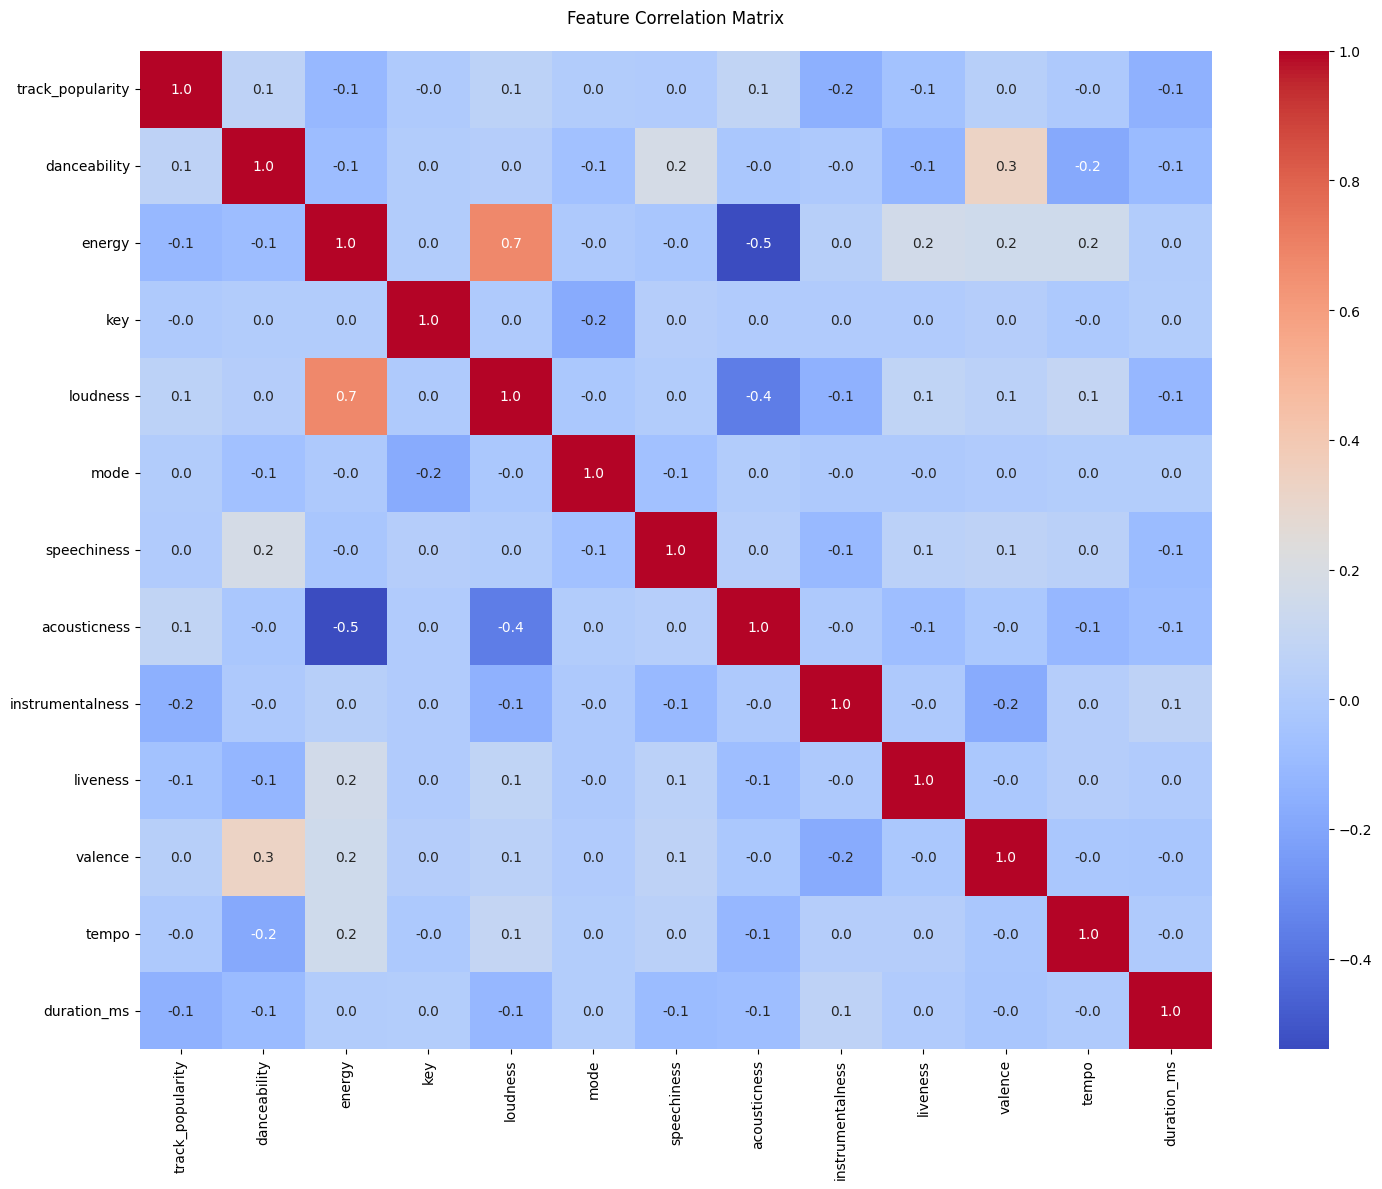

In [5]:
plt.figure(figsize=(15,12))
sns.heatmap(df[num_features].corr(), cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Feature Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()

# 3. Optimal Cluster Analysis

In [6]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[num_features])

## Calculate metrics for different k values

In [9]:
inertias = []
silhouettes = []
cluster_range = range(2, max_k+1)

In [10]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)
    inertias.append(kmeans.inertia_)
    labels = kmeans.fit_predict(reduced_data)
    silhouettes.append(silhouette_score(reduced_data, labels))

## Plot the metrics

### Silhouette Score Plot

Text(0.5, 1.0, 'Silhouette Scores')

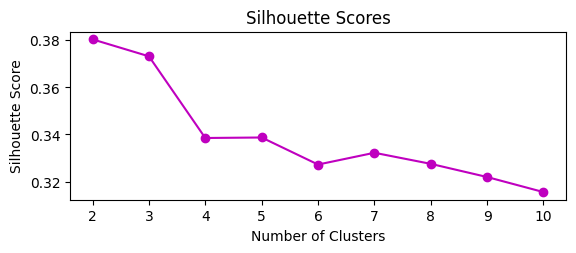

In [12]:
plt.subplot(2, 1, 1)
plt.plot(cluster_range, silhouettes, 'mo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

### Elbow Method Plot

Text(0.5, 1.0, 'Elbow Method')

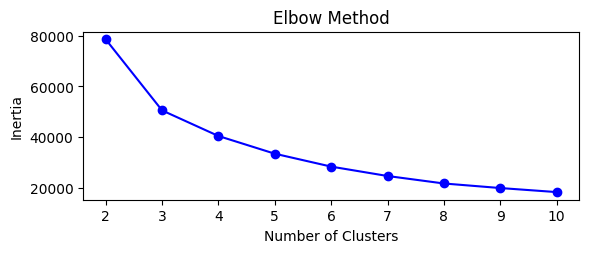

In [13]:
plt.subplot(2, 1, 2)
plt.plot(cluster_range, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

## Find optimal k using different methods
### 1. Silhouette method: Find where silhouette score starts to stabilize

In [15]:
silhouette_diff = np.diff(silhouettes)
silhouette_threshold = np.max(np.abs(silhouette_diff)) * 0.1  # 10% of max change
silhouette_k = cluster_range[1:][np.where(np.abs(silhouette_diff) < silhouette_threshold)[0][0]]

### 2. Elbow method: Find the point where the rate of decrease changes significantly

In [16]:
first_derivatives = np.diff(inertias)
first_deriv_threshold = np.max(np.abs(first_derivatives)) * 0.15  # 15% of max change
elbow_k = cluster_range[1:][np.where(np.abs(first_derivatives) < first_deriv_threshold)[0][0]]

In [17]:
print(f"""
Optimal k values from different methods:
1. Silhouette Score Method: k = {silhouette_k} (first stabilization point)
2. Elbow Method: k = {elbow_k}

Using Elbow Method (k = {elbow_k}) for final clustering.
""")


Optimal k values from different methods:
1. Silhouette Score Method: k = 5 (first stabilization point)
2. Elbow Method: k = 7

Using Elbow Method (k = 7) for final clustering.



# 4. Final Clustering

In [18]:
kmeans = KMeans(n_clusters=elbow_k, random_state=42)
df['cluster'] = kmeans.fit_predict(reduced_data)

## Plot audio feature clusters with centroids

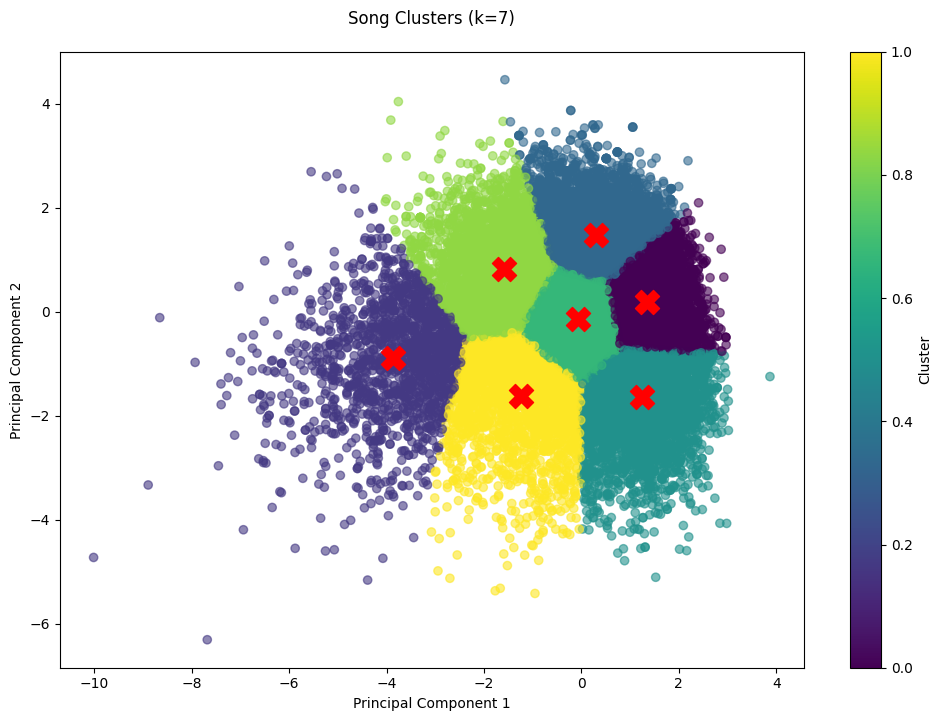

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(reduced_data[:,0], reduced_data[:,1], 
            c=df['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='red', marker='X')
plt.title(f'Song Clusters (k={elbow_k})', pad=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# 5. Genre/Cluster Visualization

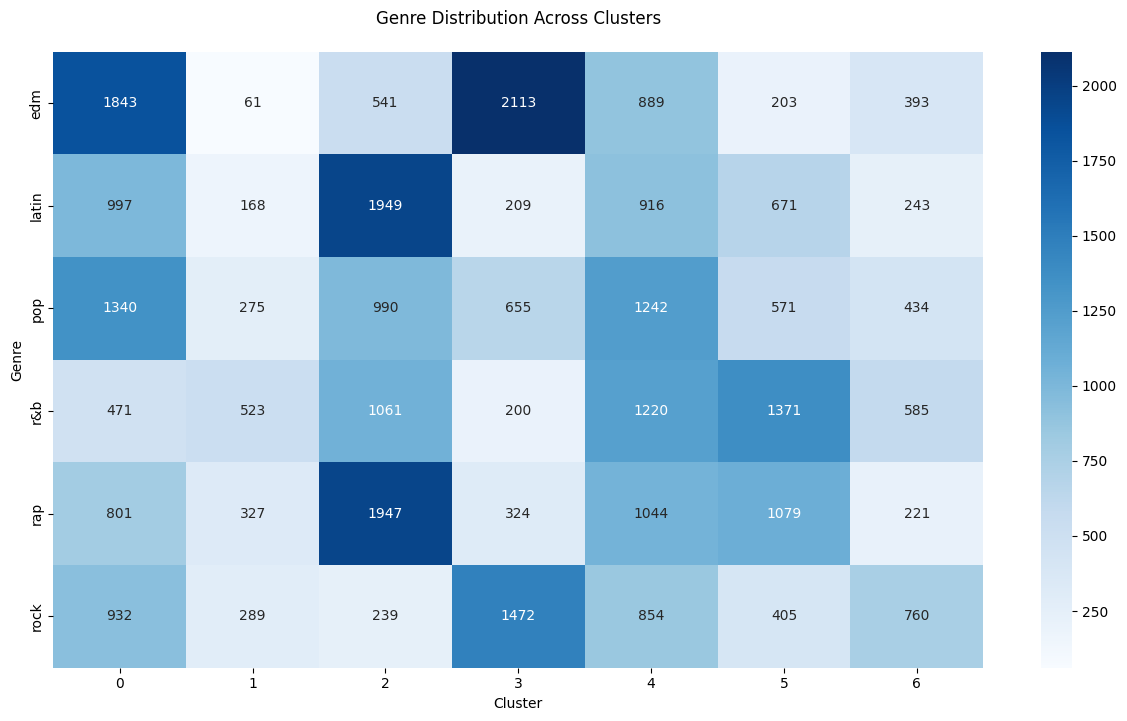

In [20]:
plt.figure(figsize=(15,8))
genre_cluster = pd.crosstab(df['playlist_genre'], df['cluster'])
sns.heatmap(genre_cluster, cmap='Blues', annot=True, fmt='d')
plt.title('Genre Distribution Across Clusters', pad=20)
plt.ylabel('Genre')
plt.xlabel('Cluster')
plt.show()

# 6. Feature Importance Analysis

In [21]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=num_features
)

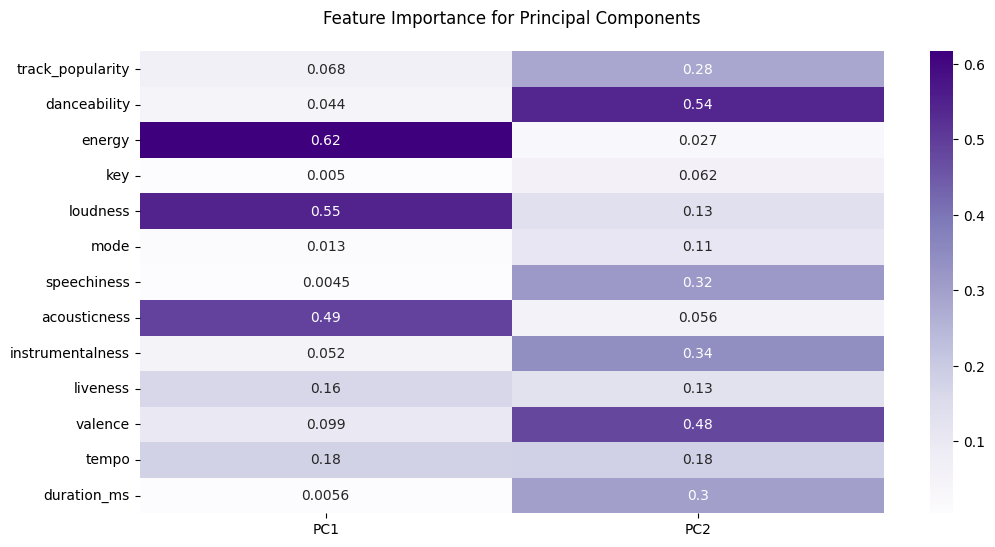

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(loadings.abs(), cmap='Purples', annot=True)
plt.title('Feature Importance for Principal Components', pad=20)
plt.show()

# 7. Additional Visualizations

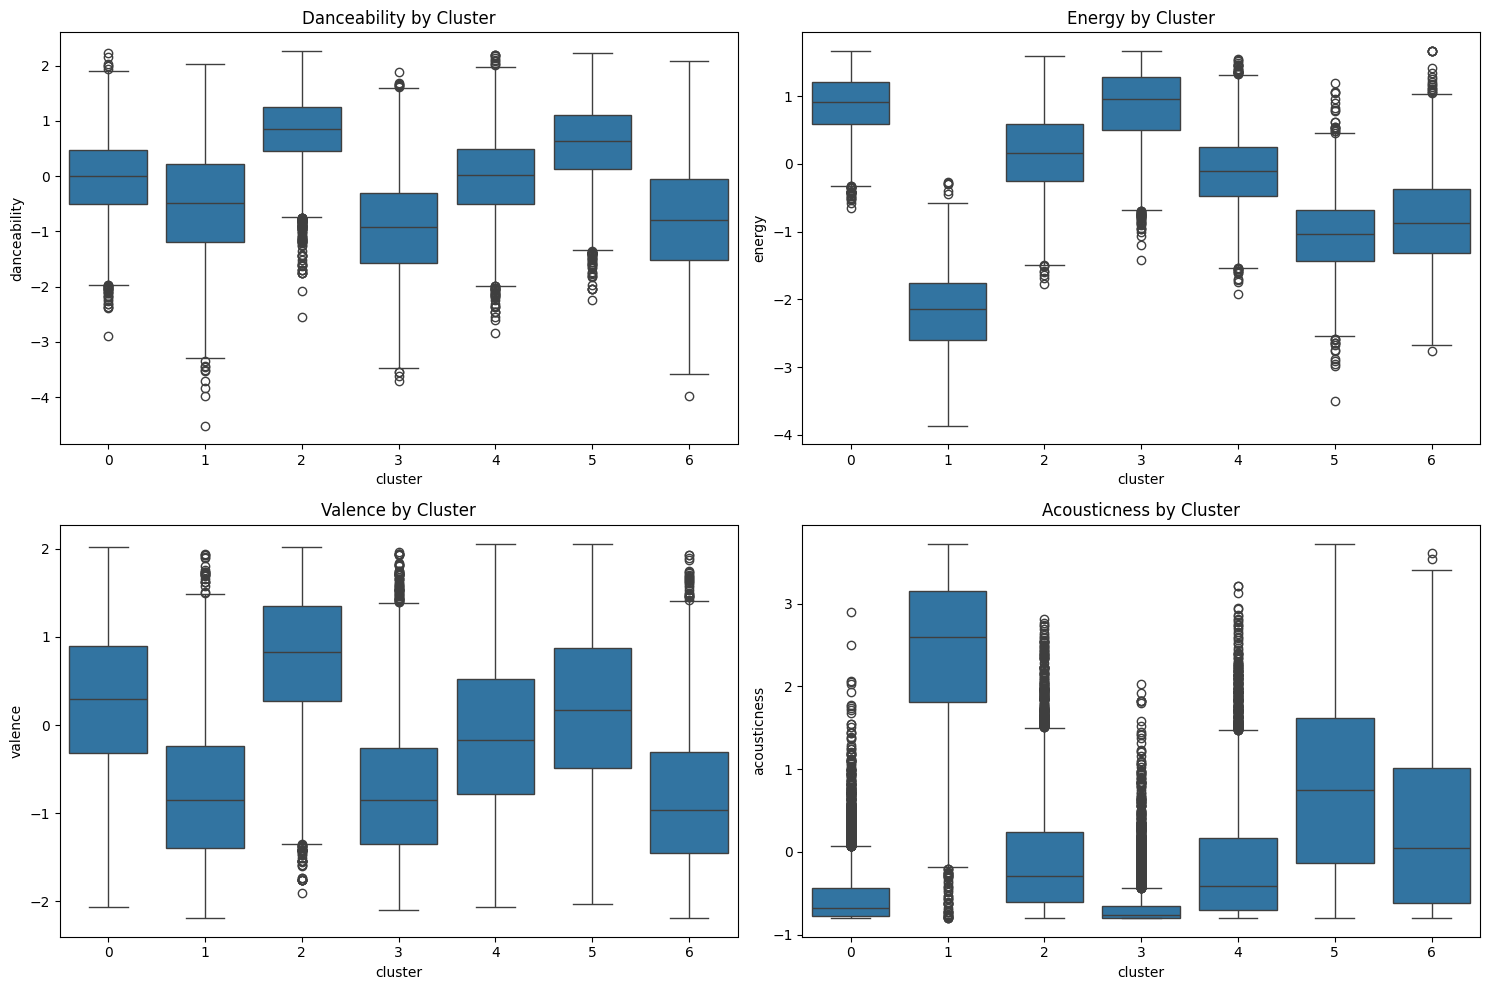

In [23]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(['danceability', 'energy', 'valence', 'acousticness']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Cluster')
plt.tight_layout()
plt.show()

In [24]:
print(f"""
Analysis completed with optimal k={silhouette_k} clusters (determined by silhouette method).
Generated visualizations:
1. correlation_matrix.png
2. cluster_analysis.png (elbow method and silhouette score plots)
3. audio_clusters.png
4. genre_clusters.png
5. feature_importance.png
6. cluster_features.png
""")


Analysis completed with optimal k=5 clusters (determined by silhouette method).
Generated visualizations:
1. correlation_matrix.png
2. cluster_analysis.png (elbow method and silhouette score plots)
3. audio_clusters.png
4. genre_clusters.png
5. feature_importance.png
6. cluster_features.png

